# **Simulazione di sistemi di servizio M/M/1 e M/M/2 in equilibrio statistico e nel transiente con Python**
# di Esposito Giorgio Angelo, matricola 0512107389, per il corso di Simulazione

Per l'esame per il corso di Simulazione, docente di riferimento professoressa Amelia Giuseppina Nobile, si è deciso di esporre quelli che in letteratura sono chiamati sistemi di servizio M/M/1 e M/M/2 e di utilizzare algoritmi per simulare tali sistemi al computer.
In questo notebook ci proponiamo i seguenti obiettivi:

1.   Introdurre cos'è un sistema di servizio
2.   Esporre cosa sono i sistemi M/M/1 e M/M/2
3.   Simulare il sistema M/M/1 in condizioni di equilibrio statico e nel transiente
4.   Simulare il sistema M/M/2 in condizioni di equilibrio statico e nel transiente



# **INTRODUZIONE**



---


**Descrizione di un sistema di servizio**

Prima di esporre cosa sono i sistemi M/M/1 e M/M/2, vediamo alcune definizioni fondamentali.  
La *teoria delle file di attesa* (o *teoria delle code*) si occupa dello studio e dell'analisi di modelli matematici e di simulazione atti a descrivere veri sistemi dove un utente richiede un servizio e deve attendere in una coda se non può ricevere immediatamente il servizio. 
Un sistema di servizio è formato da quattro componenti fondamentali:


1.   **Sorgente**: rappresenta l'insieme dei potenziali utenti che possono arrivare al sistema di servizio
2.   **Centro di attesa**: rappresenta l'insieme delle richieste che non possono essere soddisfatte immediatamente
3.   **Centro di servizio**: rappresenta il luogo dove vengono soddisfatte le richieste degli utenti. Al suo interno sono presenti uno o più servitori. Un **servitore** è un entità capace di soddisfare le richieste di un utente.
4.   **Destinazione**: rappresenta l'insieme delle richieste che sono state soddisfatte e che lasciano il sistema.  


Per descrivere un sistema di servizio bisogna anche specificare quelli che sono i **meccanismi di arrivo** e i **meccanismi di servizio**.



---


**Meccanismi di arrivo**

I meccanismi di arrivo indicano la funzione di distribuzione delle variabili aleatorie $T_1$,$T_2$,..., che rappresentano i *tempi di interarrivo*, ovvero la lunghezza dell'intervallo tra l'arrivo $(i-1)-esimo$ e l'arrivo $i-esimo$.  
I più frequenti meccanismi di arrivo sono:


*   $D$: i tempi di interarrivo sono indipendenti e identicamente distribuiti con funzione di distribuzione deterministica
*   $U$: i tempi di interarrivo sono indipendenti e identicamente distribuiti con funzione di distribuzione uniforme
*   $M$: i tempi di interarrivo sono indipendenti e identicamente distribuiti con funzione di distribuzione esponenziale
*   $E_k$: i tempi di interarrivo sono indipendenti e identicamente distribuiti con funzione di distribuzione di Erlang di ordine $k$
*   $H_K$: i tempi di interarrivo sono indipendenti e identicamente distribuiti con funzione di distribuzione iperesponenziale di ordine $k$
*   $G$: i tempi di interarrivo sono indipendenti e identicamente distribuiti con funzione di distribuzione generale



---


**Meccanismi di servizio**

I meccanismi di servizio indicano la funzione di distribuzione delle variabili aleatorie $S_1$,$S_2$,..., che rappresentano i *tempi di servizio*, per ognuno degli utenti.  
I più frequenti meccanismi di servizio sono:


*   $D$: i tempi di servizio sono indipendenti e identicamente distribuiti con funzione di distribuzione deterministica
*   $U$: i tempi di servizio sono indipendenti e identicamente distribuiti con funzione di distribuzione uniforme
*   $M$: i tempi di servizio sono indipendenti e identicamente distribuiti con funzione di distribuzione esponenziale
*   $E_k$: i tempi di servizio sono indipendenti e identicamente distribuiti con funzione di distribuzione di Erlang di ordine $k$
*   $H_K$: i tempi di servizio sono indipendenti e identicamente distribuiti con funzione di distribuzione iperesponenziale di ordine $k$
*   $G$: i tempi di servizio sono indipendenti e identicamente distribuiti con funzione di distribuzione generale



---


**Notazione di Kendall**

Per rappresentare un sistema di servzio si una una notazione standard chiamata *notazione di Kendall*: generalmente, si indica un sistema di servizio nel seguente modo: $A/B/s/K/m/Z$, dove:


*   $A$: indica il meccanismo di arrivo
*   $B$: indica il meccanismo di servizio
*   $s$: indica il numero dei servitori in parallelo
*   $K$: indica la capacità del sistema, ovvero il numero massimo di utenti che possono essere nel sistema (in coda e in servizio)
*   $m$: indica la dimesione della sorgente (finita o infinita)
*   $Z$: indica la disciplina di servizio, ovvero come vengono selezionati gli utenti dalla coda di attesa ($FIFO, LIFO, SIRO, PRI)$

I valori per $A$ e $B$ sono quelli indicati sopra.  
Si può anche utilizzare una notazione abbreviata $A/B/s$ dove si intende che il sistema ha capacità illimitata, la sorgente è infinita e la disciplina di servizio è la $FIFO$.









---


**Processi di nascita-morte**

Per rappresentare un sistema di servizio utilizziamo dei processi stocastici continui nel tempo e discreti nello spazio degli stati, $\bigl\{N(t), t \geq 0 \bigr\}$, dove $N(t)$ rappresenta il numero di utenti nel sistema al tempo $t$, detti *processi stocastici di nascita-morte*.  
I processi stocastici di nascita-morte permettono di rappresentare sistemi dove gli stati sono il numero di individui e i cambiamenti di stato rappresentano l'arrivo (quindi la nascita) di nuovi utenti e la partenza (quindi la morte) di utenti. Gli insiemi $\bigl\{\lambda_n: n = 0,1,2....\bigr\}$ e $\bigl\{\mu_n: n = 1,2,3....\bigr\}$ rappresentano i parametri di arrivo e di partenza.  
Se si verificano solo arrivi, allora il processo $\bigl\{N(t), t \geq 0 \bigr\}$ prende il nome di *processo di Poisson*.

Nei processi di nascita-morte siamo interessati alle probabilità che al tempo *t* ci siano *n* utenti, ovvero che 
\begin{align}
    p_n(t) = P\bigl\{N(t) = n\bigr\} 
\end{align}

ma queste probabilità sono molto difficili da calcolare, quindi vogliamo trovare delle condizioni su $\bigl\{\lambda_n: n = 0,1,2....\bigr\}$ e $\bigl\{\mu_n: n = 1,2,3....\bigr\}$ per arrivare a una condizione di *equilibrio statistico*.  
Indichiamo con
\begin{align}
    q_n(t) = lim_{t \to +\infty} p_n(t)  
\end{align}

la probabilità di avere n utenti nel sistema nella situazione di equilibrio.  
Allora un processo di nascita-morte $\bigl\{N(t), t \geq 0 \bigr\}$ ammette una distribuzione di equilibrio statistico $\bigl\{q_0,q_1,...\bigr\}$ se e solo se:  

\begin{align}
  1 + ∑_{n=1}^{+\infty} \frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}} < +\infty 
\end{align}

e si ha 

\begin{align}
q_0 = P(N = 0) = \biggl[1 + ∑_{n=1}^{+\infty} \frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}} \biggr]^{-1}
\end{align}

e

\begin{align}
q_n = P(N = n) = q_0\frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}}
\end{align}

# **Sistema M/M/1**
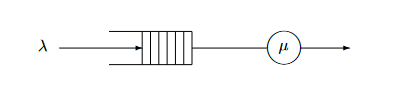

Il sistema M/M/1 è un sistema di servizio con un unico servitore, dove i tempi di interarrivo sono indipendenti e identicamente distribuiti secondo una distribuzione esponenziale di valore medio $1/\lambda$ e i tempi di servzio sono indipendenti e identicamente distribuiti secondo una distribuzione esponenziale di valore medio $1/\mu$. La capacità del sistema è illimitata, la sorgente è infinita e gli utenti entrano in servizio secondo la disciplina $FIFO$.  
In questo sistema, dopo ogni arrivo di un utente, se il servitore è libero, allora l'utente entra subito in servizio, altrimenti, se all'arrivo il servitore è occupato, l'utente attenderà in coda. Al termine del servizio, l'utente lascia il sistema e un nuovo utente entra in servizio dopo essere stato in coda.

Indichiamo con $N(t)$ il numero di utenti nel sistema al tempo $t$. Possiamo rappresentare il sistema M/M/1 tramite un processo di nascita-morte $\bigl\{N(t), t \geq 0 \bigr\}$ di parametri:

$\lambda_n = \lambda$ (n = 0,1,2,...) e $\mu_n = \mu$ (n = 1,2,3,...)

Il sistema raggiunge una condizione di equilibrio se

\begin{align}
  1 + ∑_{n=1}^{+\infty} \frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}} = ∑_{n = 0}^{+∞} {\bigg(\frac{\lambda}{\mu}\bigg)}^n =  ∑_{n = 0}^{+∞} ϱ^n
\end{align}

la serie converge, quindi se $ϱ < 1$ e otteniamo:

\begin{align}
  q_0 = P(N = 0) = 1 - ϱ
\end{align}

\begin{align}
  q_n = P(N = n) = (1 - ϱ)ϱ^n \:(n = 1,2,....)
\end{align}


Una volta calcolate le probabilità in condizioni di equilibrio statistico possiamo calcolare i parametri prestazionali del sistema. Sono riportati di seguito:


*   Frequenza media di arrivo per unità di tempo: $λ^* = λ$
*   Frequenza media di arrivo per unità di tempo: $μ^* = μ$
*   Intensità di traffico: $ϱ^* = \:\frac{λ}{μ}$
*   Numero medio di utenti nel sistema: $E(N) =\: \frac{ϱ}{1 - ϱ}$
*   Numero medio di utenti in coda: $E(N_q) =\: \frac{ϱ^2}{1 - ϱ}$
*   Numero medio di utenti in servizio: $E(N_s) =\: \frac{λ}{μ}$
*   Tempo medio di attesa nel sistema: $E(W) = \frac{1}{μ - λ}$
*   Tempo medio di attesa in coda: $E(Q) =\: \frac{ϱ}{μ - λ}$
*   Tempo medio di attesa in servizio: $E(S) = \frac{1}{μ}$


# **Sistema M/M/2**

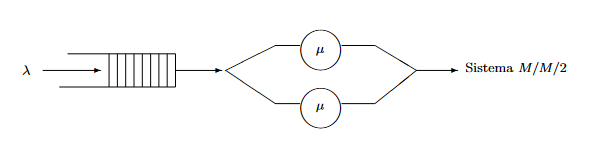



Il sistema M/M/2 è un sistema di servizio con due servitori, dove i tempi di interarrivo sono indipendenti e identicamente distribuiti esponenzialmente di valore medio $1/λ$ e i tempi di servizio per ognuno dei due servitori sono indipendenti e identicamente distribuiti esponenzialmente di valore medio $1/μ$. La capacità del sistema è illimitata, la sorgente è infinita e gli utenti entrano in servizio secondo la disciplina $FIFO$.  
All' arrivo di un utente, se uno dei due servitori è libero allora l'utente si dirige verso quel servitore, se entrambi i servitori sono liberi, sceglie a caso verso quale dirigersi, mentre se sono entrambi occupati aspetta in coda.  

Indichiamo con $N(t)$ il numero di utenti presenti nel sistema al tempo $t$. Il sistema M/M/2 è rappresentabile tramite un processo di nascita-morte $\bigl\{N(T), t \geq 0 \bigr\}$ di parametri:
\begin{align}  
\lambda_n = \lambda (n = 0,1,2,...)   
\end{align}

e

\begin{align}
        \mu_n = \mu min(2,n) = \left\{
        \begin{array}{cl}
        μ & n = 1 \\
        2μ & n = 2,3...
        \end{array}
        \right.
    \end{align}
  

Il sistema raggiunge una condizione di equilibrio se

\begin{align}
  1 + ∑_{n=1}^{+\infty} \frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}} = 1 + \frac{λ}{μ} + \frac{λ^2}{μ(2μ)} + \frac{λ^3}{μ(2μ)^2}+ ... = 1 + \frac{λ}{μ} + \frac{λ^2}{μ(2μ)} ∑_{n=1}^{+\infty} {\bigg(\frac{\lambda}{2\mu}\bigg)^k}
\end{align}

ponendo $ϱ_2 = \frac{λ}{2\mu} $ la serie converge per $ϱ_2 \lt 1$ e otteniamo 

\begin{align}
 1 + ∑_{n=1}^{+\infty} \frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}} = 1 + 2ϱ_2 + 2ϱ_2^2\frac{1}{1-ϱ_2} = \frac{1 + ϱ_2}{1 - ϱ_2}
\end{align}

Le probabilità di avere n utenti in condizioni di equilibrio sono: 
\begin{align}
q_0 = P(N = 0) = \frac{1 - ϱ_2}{1 + ϱ_2}
\end{align}

\begin{align}
q_n = P(N = n) = q_0\frac{\lambda_0\lambda_1\lambda_2⋅⋅⋅λ_{n-1}}{\mu_1\mu_2\mu_2⋅⋅⋅\mu_{n}} = 2\frac{1 - ϱ_2}{1 + ϱ_2}ϱ_2^n \: (n = 1,2,...)
\end{align}


Nel sistema M/M/2 una particolare probabilità è molto importante, ovvero la probabilità che *un utente deve aspettare in fila di attesa*, ovvero la probabilità che all'arrivo l'utente trovi tutti e due i servitori occupati.
\begin{align}
P(N \geq 2)  = ∑_{n = 2}^{+\infty} q_n = 2\frac{1 - ϱ_2}{1 + ϱ_2} ∑_{n = 2}^{+\infty} ϱ_2^n = 2\frac{1 - ϱ_2}{1 + ϱ_2}ϱ_2^n ∑_{n = 2}^{+\infty} ϱ_2^{n-2} = \frac{2ϱ_2^2}{1 + ϱ_2}
\end{align}

Questa probabilità prende il nome di "*formula C di Erlang*" indicata come $C[2, λ/μ]$

I parametri prestazionali del sistema sono riportati qui di seguito:

*   Frequenza media di arrivo per unità di tempo: $λ^* = λ$
*   Frequenza media di arrivo per unità di tempo: $μ^* = μ$
*   Intensità di traffico: $a =\: \frac{λ}{μ}$
*   Fattore di utilizzazione del sistema: $ϱ^*=\:\frac{λ}{2μ}$
*   Numero medio di utenti nel sistema: $E(N) = \frac{2ϱ_2}{1 - ϱ_2^2}$
*   Numero medio di utenti in coda: $E(N_q) = \frac{2ϱ_2^3}{1 - ϱ_2^2}$
*   Numero medio di utenti in servizio: $E(N_s) = \:\frac{λ}{μ}$
*   Tempo medio di attesa nel sistema: $E(W) = \frac{1}{μ(1 - ϱ_2^2)}$
*   Tempo medio di attesa in coda: $E(Q) =\: \frac{ϱ_2^2}{μ(1 - ϱ_2^2)}$
*   Tempo medio di attesa in servizio: $E(S) = \frac{1}{μ}$



# **SIMULAZIONE**

Andiamo adesso a simulare i sistemi M\M\1 e M\M\2 sia in condizioni di equilibrio statistico che nel transiente.

Per poter simulare i sistemi di servizio necessitiamo di simulare quelli che sono il numero di utenti nel sistema in condizioni di equilibrio statistico e i tempi di interarrivo e di servizio nel transiente, quindi delle variabili aleatorie discrete e continue.
Vediamo come simulare entrambi i tipi di variabili aleatorie.



---


**Simulazione di variabili aleatorie discrete**

Siamo interessati a simulare il numero di utenti presenti nel sistema in condizioni di equilibrio.  
Per simulare una variabile aleatoria discreta $X$ che assume valori $x_1,x_2,...$, con funzione di probabilità $p_j = P(N = j) = x_j$, dobbiamo suddividere l'intervallo $(0,1)$ in tanti sottointervalli di ampiezza $p_1,p_2,...$ tali che $p_1 + p_2 + ... = 1$. Fatto ciò andiamo a simulare una variabile aleatoria $U$ uniformemente distribuita nell'intervallo $(0,1)$. La funzione di probabilità di $X$ sarà determinata dalla seguente relazione:
\begin{align}
        X = \left\{
        \begin{array}{cl}
        x_1, & 0 \leq U < p_1 \\
        x_2, & p_1 \leq U < p_1+p_2 \\
        ...\\
        ...\\
        ...\\
        x_j, & ∑_{i = 1}^{j-1} p_i \leq U < ∑_{i = 1}^{j} p_i \\
        ...\\
        ...\\
        ...\\
        \end{array}
        \right.
    \end{align}



---


**Simulazione di variabili aleatorie continue**

Siamo interessati nel nostro caso a simulare tempi di interarrivo e di servizio distribuiti esponenzialmente. Un modo per simulare questo tipo di variabili aleatorie è il "*metodo di inversione della funzione di distribuzione*".  
Il metodo di inversione della funzione di distribuzione permette di simulare una variabile aleatoria continua partendo da una variabile aleatoria uniformemente distribuita nell'intervallo $(0, 1)$.  
Quindi: sia $U$ una variabile aleatoria uniformemente distribuita nell'intervallo $(0, 1)$. La variabile aleatoria continua $X$ può essere ottenuta nel seguente modo:

$X = F^{-1}(U)\:\:\:$ o $\:\:\:U = F(X)$

Quindi, se $X$ ha una funzione di distribuzione invertibile $F(x)$, generando una variabile aleatoria uniformemente distribuita nell'intervallo $(0, 1)$ posso simulare $X$ ponendo una delle due condizioni sopra indicate.

Ora che abbiamo visto come simulare i tempi di interarrivo e di servizio, procediamo a descrivere come simuliamo i sistemi M/M/1 e M/M/2



---


**Linguaggio e funzioni utili**

Per simulare i nostri sistemi di servizio useremo il linguaggio Python e alcune sue librerie:

*   `pandas`: pandas è una libreria che permette di operare sui dati
*   `numpy`: numpy è una libreria che permette di eseguire funzioni matematiche e operazioni su array
*   `matplotlib.pyplot` è una libreria che permette di realizzare grafici

Il comando `import` permette di importare le librerie.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Prima di passare alla simulazione dei sistemi di servizio, dobbiamo creare una funzione che ci permetta di generare una sequenza di numeri uniformi. La funzione `uniform` contenuta nella libreria `numpy` permette di creare un array di dimensione n di numeri uniformi in un intervallo specificato *(a, b)*. Quindi, la possiamo usare per definire l'equivalente della funzione `runif` del linguaggio `R`. La funzione semplicemente riceve come parametro il numero *n* che rappresenta il numero di elementi da generare. La funzione restituirà in output il vettore `u` di *n* numeri uniformi.


In [ ]:
def PythonUnif(n):
  u = np.random.uniform(0.0,1.0,size=n)
  
  return u

Inoltre, definiamo una funzione che ci permette di visualizzare in un `DataFrame` il numero di elementi all'interno di un `array`.

In [ ]:
def table(a):
  elements, count = np.unique(a,return_counts=True)
  df = pd.DataFrame(data = count, columns=['Numero utenti'])
  df.set_index(elements.astype(int), inplace=True)
  return df

# Simulazione del sistema **M/M/1** in equilibrio statistico

Il nostro scopo è quello di simulare una sequenza che descriva il numero di utenti in un sistema in condizioni di equilibio e confrontare i risultati ottenuti con i risultati teorici. In particolare ci interessiamo del numero medio di utenti nel sistema $E(N) = \:\frac{ϱ}{1 - ϱ}$ e delle probabilità di avere un determinato numero di utenti in condizione di equilibrio statistico $q_n$



---


Sia N la variabile aleatoria che indica il numero di utenti presenti nel sistema in condizioni di equilibrio statistico. Dobbiamo simulare questa variabile aleatoria.  
Dobbiamo quindi generare una variabile aleatoria uniformemente distribuita in $(0,1)$ e porre:

\begin{align}
N = \Bigl\lfloor\frac{log(1 -U)}{logϱ}\Bigr\rfloor
\end{align}

dove ⌊x⌋ rappresenta il più grande intero minore o uguale di x.


---



La funzione `MM1queue` ha come argomenti in input il numero `n` che rappresenta la lunghezza della sequenza da generare, il parametro `rho` e il `seme` da utilizzare (in questo modo se eseguiremo la funzione più volte otterremo sempre gli stessi risultati)

In [ ]:
def MM1queue(n, rho, seme):
  np.random.seed(seme) #impostiamo il seme
  u = PythonUnif(n) #generiamo una variabile uniformemente distribuita in (0,1)
  w = np.log(1-u)/np.log(rho) #simuliamo i valori della variabile aleatoria N
  N = np.floor(w) #otteniamo i valori dei più grandi interi minori o uguali di w

  return N

Eseguiamo la funzione con `n` = 1000, `rho` = 0.6 e `seme` = 3 e stampiamo in output la media degli utenti e le frequenze assolute ed relative del numero di utenti nel sistema. 

In [ ]:
utenti = MM1queue(1000,0.6,3)
print("Numero medio utenti: {}".format(np.mean(utenti)))
print("\n")
df = table(utenti)
print("Frequenza assoluta utenti: \n",df.T)
print("\n")
print("Frequenza relativa utenti: \n", np.round(df.T/len(utenti),3))

I risultati ottenuti con $ϱ = 0.6 = \frac{2}{3} = \:\frac{λ}{μ}$ dimostrano che i risultati ottenuti tramite la simulazione sono in accordo con i risultati teorici. Infatti: 

$E(N) = \frac{ϱ}{1 - ϱ} = \frac{0.6}{0.4} = 1.5$

e

$q_0 = 1 - ϱ = 0.4$  
$q_2 = (1 - ϱ)ϱ^n = 0.4⋅(0.6)^2 = 0.144$



# Simulazione del sistema **M/M/1** nel transiente

Per questa simulazione vogliamo calcolare:


*   Le stime di avere k utenti nell'intervallo $(0,t_f)$
*   Una stima del numero medio di utenti nel sistema nell'intervallo $(0,t_f)$



---


Quando simuliamo un sistema nel transiente, dobbiamo simulare le variabili aleatorie che rappresentano i tempi di arrivo e i tempi di servizio. Nel nostro caso queste variabili sono indipendenti e uniformemente distribuite secondo una funzione di distribuzione esponenziale. Dobbiamo quindi simulare questa tipologia di variabili continue.  
Quindi sia $X$ una variabile aleatoria esponenziale di valore medio $1/λ$ con funzione di distribuzione:

\begin{align}
        F_X(x) = P(X < x) = \left\{
        \begin{array}{cl}
        0 & x \leq 0 \\
        1-e^{-λx} & x > 0
        \end{array}
        \right.
    \end{align}

  

Poniamo $U = F(X) = 1-e^{-λX}$ e ricaviamo la X:

$e^{-λX} = 1 - U \rightarrow -λX = log(1 - U) \rightarrow X = -\frac{1}{λ}log(1 - U)$  
Quindi, ci basterà generare una variabile aleatoria uniformente distribuita in $(0,1)$ di valori $u_0,u_1,...$ e ricavare i valori $x_i$ nel seguente modo:  
$x_i = -\frac{1}{λ}log(1 - u_i) \:\:\:\:\: (i = 0,1,2....)$


---



**Procedura di arrivo**

La funzione `procedura_arrivo` simula l'arrivo di un utente nel sistema. Riceve come parametri il tempo `t`, il tempo del nuovo arrivo `t_A`, il tempo di completamento del servizio dell'utente in servizio `t_U`, il numero cumulativo degli arrivi `N_A`, il numero di utenti nel sistema `n`, il numero di utenti in coda `n_q`, il parametro lambda `l` e il parametro mu `mu`

In [ ]:
def  procedura_arrivo(t, t_A, t_U, N_A, n, n_q, l, mu):
  print("### - Procedura di arrivo - ###")
  t = t_A #il tempo di osservzione diventa il tempo di nuovo arrivo
  N_A += 1 #il numero cumulativo di arrivi viene incrementato di 1
  n += 1 #il numero di utenti nel sistema viene incrementato di 1
  if(n == 1): #se nel sistema è presente un solo utente
    u = PythonUnif(1) 
    s = -np.log(1-u)/mu #generiamo il tempo di servizio s
    #registriamo il tempo di completamento di servizio come il tempo attuale
    #sommato al tempo di servizio
    t_U = t + s 
  elif(n > 1): #se nel sistema sono presenti più utenti
    n_q += 1 #il numero di utenti in coda viene incrementato di 1
  
  u = PythonUnif(1)
  a = -np.log(1-u)/l #generiamo un nuovo tempo di interarrivo
  t_A = t + a #il nuovo arrivo si verificherà al tempo t sommato il nuovo tempo di interarrivo

  return t, t_A, t_U, N_A, n, n_q

**Procedura di partenza**

La funzione `procedura_partenza` simula la partenza di un utente dal sistema. Riceve come parametri il tempo `t`, il tempo di completamento del servizio dell'utente attualmente in servizio `t_U`, il numero cumulativo di partenze dal sistema `N_U`, il numero di utenti nel sistema `n`, il numero di utenti in coda `n_q`, il parametro lambda `l` e il parametro mu `mu`

In [ ]:
def procedura_partenza(t, t_U, N_U, n, n_q, l, mu):
  print("### - Procedura di partenza - ###")
  t = t_U #il tempo di osservazione diventa il tempo di partenza dal sistema
  N_U += 1 #il numero cumulativo di partenze viene incrementato di uno
  n -= 1 #il numero di utenti nel sistema viene decrementato di uno
  if(n > 0): #se nel sistema ci sono altri utenti
    n_q -= 1 #il numero di utenti in coda viene decrementato
    u = PythonUnif(1)
    s = -np.log(1-u)/mu #generiamo un tempo di servizio
    t_U = t + s #il tempo di partenza sarà uguale al tempo osservato sommato il tempo di servizio
  elif(n == 0): #altrimenti se il numero di utenti nel sistema è zero
    t_U = np.inf #il successivo tempo di partenza viene posto a infinito

  return t, t_U, N_U, n, n_q


**Procedura di terminazione**

La funzione `procedura_terminazione` simula la partenza degli utenti rimasti nel sistema quando la simulazione termina. Riceve in input come parametri gli stessi della funzione `procedura_partenza`

In [ ]:
def procedura_terminazione(t, t_U, N_U, n, n_q, l, mu):
  print("### - Procedura di terminazione - ###")
  df = pd.DataFrame(columns = ['t','N_A','N_U','n','n_q','t_A','t_U','Procedura'])
  j = 0
  while(n > 0): #fino a quando nel sistema ci sono utenti
    #inneschiamo procedure di partenza
    t, t_U, N_U, n, n_q = procedura_partenza(t, t_U, N_U, n, n_q, l, mu)
    df.loc[j,'t'] = t
    df.loc[j,'N_A'] = N_A
    df.loc[j,'N_U'] = N_U
    df.loc[j,'n'] = n
    df.loc[j,'n_q'] = n_q
    df.loc[j,'t_A'] = t_A
    df.loc[j,'t_U'] = t_U
    df.loc[j,'Procedura'] = 'Procedura di terminazione'
    j += 1

  return t, t_U, N_U, n, n_q, df

**Procedura di simulazione**

In [ ]:
t_c = 50 #tempo totale di simulazione
N_A = 0 #numero cumulativo di arrivi 
N_U = 0 #numero cumulativo di partenze
n = 0 #numero totale di utenti nel sistema
n_q = 0 #numero totale di utenti in coda
t = 0 #tempo di osservazione degli eventi
l = 2 #lambda
mu = 3 #mu

u = PythonUnif(1)
t_A = -np.log(1-u)/l #tempo del nuovo arrivo nel sistema
t_U = np.inf #tempo di partenza dal sistema

df = pd.DataFrame(columns = ['t','N_A','N_U','n','n_q','t_A','t_U','Procedura'])
i = 1
df.loc[0,'t'] = t
df.loc[0,'N_A'] = N_A
df.loc[0,'N_U'] = N_U
df.loc[0,'n'] = n
df.loc[0,'n_q'] = n_q
df.loc[0,'t_A'] = t_A
df.loc[0,'t_U'] = t_U

df.loc[0,'Procedura'] = 'Inizializzazione'

while (t < t_c):
  t_f = t
  i += 1
  if(t_A <= t_U and t_A <= t_c):
    #se il tempo di arrivo del nuovo utente è minore o uguale del tempo di completamento di servizio dell'
    #utente attualmente in servizio e questo nuovo tempo di arrivo è minore del tempo massimo di simulazione
    #si innesca la proceura di arrivo 
    df.loc[i,'Procedura'] = 'Procedura di arrivo'
    t, t_A, t_U, N_A, n, n_q = procedura_arrivo(t, t_A, t_U, N_A, n, n_q, l, mu)
  elif(t_U < t_A and t_U <= t_c):
    #se il tempo di completamento di servizio è minore o uguale del tempo del nuovo tempo di arrivo
    #e il tempo di completamento del servizio è minore del tempo massimo di simulazione
    #si innesca la proceura di partenza 
    df.loc[i,'Procedura'] = 'Procedura di partenza'
    t, t_U, N_U, n, n_q = procedura_partenza(t, t_U, N_U, n, n_q, l, mu)
  elif(np.minimum(t_A,t_U) > t_c):
    #se il minimo tra il tempo di nuovo arrivo e il tempo di completamento del servizio
    #è maggiore del tempo massimo di simulazione
    #si innesca la procedura di terminazione
    t, t_U, N_U, n, n_q, df1 = procedura_terminazione(t, t_U, N_U, n, n_q, l, mu)
    break

  df.loc[i,'t'] = t
  df.loc[i,'N_A'] = N_A
  df.loc[i,'N_U'] = N_U
  df.loc[i,'n'] = n
  df.loc[i,'n_q'] = n_q
  df.loc[i,'t_A'] = t_A
  df.loc[i,'t_U'] = t_U

df = pd.concat([df,df1], ignore_index=True)
df

Creiamo un grafico a scalini che rappresenta il numero di utenti nel sistema nel'intervallo di tempo $(0,t_f)$



---
**Grafico**


In [ ]:
a = df['n'].max()
plt.figure(figsize=(17,11))
plt.step(df['t'],df['n'], color = 'black')
plt.title('Numero di utenti al tempo t', fontsize = 17)
plt.xlabel('t', fontsize = 18)

plt.ylabel('N(t)', fontsize = 18)
plt.yticks(range(0,a+1,1))
plt.show()



---


**Calcolo delle stime**

In [ ]:
n = df['n'].max()

k = df['t'].copy()
k = k.diff(1)

media_utenti = 0
for i in range(0,n+1):

  t = df.loc[df['n'] == i]
  index = np.array(t.index)
  if i == 0: index = np.delete(index,0)
  a = 0
  for j in index:
    a += k[j]
  
  media_utenti += i*(a/t_f)

  q_i = "Stima di avere "+str(i)+" utenti nel sistema, q"+str(i)+" = "
  print(q_i + "{}".format(a/t_f))

print("Stima del numero medio di utenti nel sistema: {}".format(media_utenti))

#Simulazione del sistema **M/M/2** in equilibrio statistico

Per questa simulazione, vogliamo calcolare:

*   Numero medio di utenti nel sistema
*   Alcune probabilità di avere un determinato numero di utenti nel sistema in condizioni di equilibrio statistico

e confrontare i risultati ottenuti con i valori teorici




---


Sia N la variabile aleatoria che indica il numero di utenti presenti nel sistema in condizioni di equilibrio statistico. Dobbiamo simulare questa variabile aleatoria.  
Per fare ciò occorre generare una variabile aleatoria uniformemente distribuita in $(0,1)$ e porre:

\begin{align}
N = \Bigl\lfloor\frac{1}{ϱ_2}log(\frac{(1 - U)(1 + ϱ_2)}{2})\Bigr\rfloor
\end{align}

dove ⌊x⌋ rappresenta il più grande intero minore o uguale di x.


---



Definiamo una funzione `MM2queue`, che riceve in input i parametri: `n` (la lunghezza della sequenza da generare), `rho2` e il `seme`

In [ ]:
def MM2queue(n, rho2, seme):
  np.random.seed(seme) #impostiamo il seme
  u = PythonUnif(n) #generiamo una variabile aleatoria uniformemente distribuita in (0,1)
  w = np.log((1-u)*(1+rho2)/2)/np.log(rho2) #calcoliamo i valori della variabile aleatoria N
  N = np.floor(w) #otteniamo i valori dei più grandi interi minori o uguali di w
  return N

Eseguiamo la funzione con `n` = 1000, `rho2` = 0.625 e `seme` = 3 e stampiamo in output la media degli utenti e le frequenze assolute ed relative del numero di utenti nel sistema. 

In [ ]:
utenti = MM2queue(1000, 0.625, 3)
print("Numero medio utenti: {}".format(np.mean(utenti)))
df = table(utenti)
print("Frequenza assoluta utenti: \n",df.T)
print("\n")
print("Frequenza relativa utenti: \n", np.round(df.T/len(utenti),3))

I risultati ottenuti con $ϱ_2 = 0.625 = \frac{5}{8} = \:\frac{λ}{2μ}$ dimostrano che i risultati ottenuti tramite la simulazione sono in accordo con i risultati teorici. Infatti: 

$E(N) = \frac{2ϱ_2}{1-ϱ_2^2} = 2.051$

e

$q_0 = \frac{1-ϱ_2}{1 + ϱ_2} = 0.231$  
$q_2 = 2\frac{1 - ϱ_2}{1+ϱ_2}ϱ_2^2 = 0.180$

#Simulazione del sistema **M/M/2** nel transiente

Per questa simulazione vogliamo calcolare:


*   Le stime di avere k utenti nell'intervallo $(0,t_f)$
*   Una stima del numero medio di utenti nel sistema nell'intervallo $(0,t_f)$ 
*   Una stima del tempo medio di attesa nel sistema nell'intervallo $(0,t_f)$





---


**Procedura di arrivo**

La funzione `procedura_arrivo_due_servitori` simula l'arrivo nel sistema di un utente. Riceve in input il tempo `t`, il tempo del nuovo arrivo `t_A`, il numero cumulativo di arrivi `N_A`, il numero di utenti nel sistema `n`, lo stato del sistema `SS`, il tempo di completamento di servizio dell'utente presso il servitore 1 `t1`, il tempo di completamento di servizio dell'utente presso il servitore 2 `t2`, il numero associato all'utente in servizio presso il servitore 1 `i1`, il numero associato all'utente in servizio presso il servitore 2 `i2`, la lista dove salvare i tempi di arrivo `A`, la frequenza di arrivo `l` e la frequenza di partenza `mu`

In [ ]:
def procedura_arrivo_due_servitori(t, t_A, N_A, n, SS, t1, t2, i1, i2, A, l, mu):
  print("### - Procedura di arrivo - ###\n")
  t = t_A #il tempo di osservazione diventa il tempo di nuovo arrivo
  N_A += 1 #il numero cumulativo di arrivi viene incrementato di uno
  u = PythonUnif(1)
  a = -np.log(1 - u)/l #generiamo un tempo di interarrivo
  t_A = t + a #il tempo di nuovo arrivo è uguale al tempo di osservazione sommato il tempo di interarrivo
  A.append(t) #salviamo il tempo di osservazione nella lista dei tempi di arrivo
  if (SS == (0,0,0)): #se nel sistema NON c'erano utenti e entrambi i servitori sono liberi
    u = PythonUnif(1) #generiamo una variabile uniformente distribuita in (0,1)
    if(u < 0.5):  #se la variabile generata è minore di 0,5
      SS = (1, N_A, 0) #nel sistema avremo un utente in servizio presso il primo servitore
      n = 1 #il numero di utenti nel sistema è uno
      i1 = N_A #il numero associato all'utente in servizio presso il primo servitore è N_A
      u = PythonUnif(1)
      s = -np.log(1-u)/mu #generiamo un tempo di servizio
      #il tempo di completamento del servizio del primo servitore è il tempo di osservazione sommato
      #il tempo di servizio
      t1 = t + s 
    else: #altrimenti
      SS = (1, 0, N_A) #nel sistema avremo un utente in servizio presso il secondo servitore
      n = 1 #il numero di utenti nel sistema è uno
      i2 = N_A #il numero associato all'utente in servizio presso il secondo servitore è N_A
      u = PythonUnif(1)
      s = -np.log(1-u)/mu #generiamo un tempo di servizio
      #il tempo di completamento del servizio del secondo servitore è il tempo di osservazione sommato
      #il tempo di servizio
      t2 = t + s
  elif(SS == (1, i1, 0)): #se nel sistema c'era un utente in servizio presso il primo servitore
    SS = (2, i1, N_A) #nel sistema ci sono 2 utenti e il nuovo arrivo va verso il secondo servitore
    n = 2 #il numero di utenti nel sistema è due
    i2 = N_A #il numero associato all'utente in servizio presso il secondo servitore è N_A
    u = PythonUnif(1)
    s = -np.log(1-u)/mu #generiamo un tempo di servizio
    #il tempo di completamento del servizio del secondo servitore è il tempo di osservazione sommato
    #il tempo di servizio
    t2 = t + s
  elif(SS == (1, 0, i2)): #se nel sistema c'era un utente in servizio presso il secondo servitore
    SS = (2, N_A, i2) #nel sistema ci sono 2 utenti e il nuovo arrivo va verso il primo servitore
    n = 2 #il numero di utenti nel sistema è due
    i1 = N_A #il numero associato all'utente in servizio presso il primo servitore è N_A
    u = PythonUnif(1)
    s = -np.log(1-u)/mu #generiamo un tempo di servizio
    #il tempo di completamento del servizio del primo servitore è il tempo di osservazione sommato
    #il tempo di servizio
    t1 = t + s
  elif(n > 1 and SS == (n,i1,i2)): #se entrambi i servitori sono occupati
    SS = (n+1,i1,i2) #nel sistema ci sono n+1 utenti
    n += 1 #il numero di utenti nel sistema viene incrementato di uno

  return t, t_A, N_A, n, SS, i1, i2, t1, t2, A

**Procedura di partenza dal primo servitore**

La funzione `procedura_partenza_primo_servitore` simula la partenza dal sistema dell'utente dal servitore 1. Riceve in input il tempo `t`, il tempo di completamento di servizio dell'utente presso il servitore 1 `t1`, il numero cumulativo di partenze dal servitore 1 `C1`, il numero di utenti nel sistema `n`, lo stato del sistema `SS`, il numero associato all'utente in servizio presso il servitore 1 `i1`, il numero associato all'utente in servizio presso il servitore 2 `i2`, la lista dove salvare i tempi di partenza `U` e la frequenza di partenza `mu`

In [ ]:
def procedura_partenza_primo_servitore(t, t1, C1, n, SS, i1, i2, U, mu):
  print("### - Procedura partenza primo servitore - ###\n")
  #il tempo di osservazione è il tempo di completamento del servizio dell'utente presso il
  #primo servitore
  t = t1
  C1 += 1 #il numero cumulativo di partenze dal primo servitore è incrementato di uno
  U.append(t) #salviamo il tempo di osservazione nella lista dei tempi di partenza
  if(n == 1): #se il numero di utenti nel sistema è uno
    SS = (0,0,0) #entrambi i servitori sono liberi
    n = 0 #il numero di utenti nel sistema è zero
    i1 = 0 #il numero associato all'utente presso il primo servitore è zero
    t1 = np.inf #il tempo di completamento del servizio del primo servitore è infinito
  elif(n == 2): #se nel sistema ci sono due utenti
    SS = (1,0,i2) #si verifica una partenza dal primo servitore
    n = 1 #il numero di utenti nel sistema è uno
    i1 = 0 #il numero associato all'utente presso il primo servitore è zero
    t1 = np.inf #il tempo di completamento del servizio del primo servitore è infinito
  elif(n > 2 and SS == (n,i1,i2)): #se entrambi i servitori sono occupati
    m = np.maximum(i1,i2) #otteniamo il numero associato all'utente che ha completato il servizio
    SS = (n-1,m+1,i2) #entra in servizio l'utente numerato m+1
    i1 = m+1 #il numero associato all'utente presso il primo servitore è m+1
    n -= 1 #il numero di utenti nel sistema viene decrementato di uno
    u = PythonUnif(1)
    s = -np.log(1-u)/mu #generiamo un tempo di servizio
    #il tempo di completamento del servizio dell'utente presso il primo servitore
    #è il tempo di osservazione sommato al tempo di servizio
    t1 = t + s   
  
  return t, C1, SS, i1, t1, n, U

**Procedura di partenza dal secondo servitore**

La funzione `procedura_partenza_secondo_servitore` simula la partenza dal sistema dell'utente dal servitore 2. Riceve in input il tempo `t`, il tempo di completamento di servizio dell'utente presso il servitore 2 `t2`, il numero cumulativo di partenze dal servitore 2 `C2`, il numero di utenti nel sistema `n`, lo stato del sistema `SS`, il numero associato all'utente in servizio presso il servitore 1 `i1`, il numero associato all'utente in servizio presso il servitore 2 `i2`, la lista dove salvare i tempi di partenza `U` e la frequenza di partenza `mu`

In [ ]:
def procedura_partenza_secondo_servitore(t, t2, C2, n, SS, i1, i2, U, mu):
  print("### - Procedura partenza secondo servitore - ###\n")
  #il tempo di osservazione è il tempo di completamento del servizio dell'utente presso il secondo servitore
  t = t2
  C2 += 1 #il numero cumulativo di partenze dal primo servitore è incrementato di uno
  U.append(t) #salviamo il tempo di osservazione nella lista dei tempi di partenza
  if(n == 1): #se il numero di utenti nel sistema è uno
    SS = (0,0,0) #entrambi i servitori sono liberi
    n = 0 #il numero di utenti nel sistema è zero
    i2 = 0 #il numero associato all'utente presso il secondo servitore è zero
    t2 = np.inf #il tempo di completamento del servizio del secondo servitore è infinito
  elif(n == 2): #se nel sistema ci sono due utenti
    SS = (1,i1,0) #si verifica una partenza dal primo servitore
    n = 1 #il numero di utenti nel sistema è uno
    i2 = 0 #il numero associato all'utente presso il secondo servitore è zero
    t2 = np.inf #il tempo di completamento del servizio del primo servitore è infinito
  elif(n > 2 and SS == (n,i1,i2)): #se entrambi i servitori sono occupati
    m = np.maximum(i1,i2) #otteniamo il numero associato all'utente che ha completato il servizio
    SS = (n-1,i1,m+1) #entra in servizio l'utente numerato m+1
    i2 = m+1 #il numero associato all'utente presso il secondo servitore è m+1
    n -= 1 #il numero di utenti nel sistema viene decrementato di uno
    u = PythonUnif(1)
    s = -np.log(1-u)/mu #generiamo un tempo di servizio
    #il tempo di completamento del servizio dell'utente presso il secondo servitore
    #è il tempo di osservazione sommato al tempo di servizio
    t2 = t +s

  return t, C2, SS, i2, t2, n, U

**Procedura di simulazione**

In [ ]:
t_c = 50 #tempo totale di esecuzione della simulazione
t = 0 #tempo di osservazione degli eventi
n = 0 #numero di utenti nel sistema
N_A = 0 #numero totale di arrivi fino al tempo t
C1 = 0 #numero totale di partenze dal primo servitore
C2 = 0 #numero totale di partenze dal secondo servitore
SS = (0,0,0) #variabili di stato del sistema
i1 = 0 #numero associato all'utente attualmente in servizio presso il primo servitore
i2 = 0 #numero associato all'utente attualmente in servizio presso il secondo servitore

U = list() #lista dove salviamo i tempi di partenza degli utenti
A = list() #lista dove salviamo i tempi di arrivo degli utenti

l = 4 #lambda
mu = 5 #mu

u = PythonUnif(1)
t_A = -np.log(1-u)/l #tempo del nuovo arrivo
t1 = np.inf #tempo di completamento del servizio dell' utente presso il primo servitore
t2 = np.inf #tempo di completamento del servizio dell' utente presso il secondo servitore

df = pd.DataFrame(columns = ['t','N_A','n','C1','C2','SS','A','U','Procedura'])
i = 1
df.loc[0,'t'] = t
df.loc[0,'N_A'] = N_A
df.loc[0,'n'] = n
df.loc[0,'C1'] = C1
df.loc[0,'C2'] = C2
df.loc[0,'SS'] = SS
df.loc[0,'A'] = 0
df.loc[0,'U'] = 0
df.loc[0,'Procedura'] = "Inizializzazione"

while(t < t_c):
  t_f = t
  print("Stato sistema: ", SS)
  i += 1
  if(t_A < t1 and t_A < t2):
   #se il tempo di arrivo è minore sia del tempo di completamento del servizio degli utenti in servizio
   #presso i due servitori, si innesca una procedura di partenza
   df.loc[i,'Procedura'] = "Arrivo" 
   t, t_A, N_A, n, SS, i1, i2, t1, t2, A = procedura_arrivo_due_servitori(t, t_A, N_A, n, SS, t1, t2, i1, i2, A, l, mu)
   df.loc[i,'A'] = t
   df.loc[i,'U'] = "-"
  elif(t1 < t_A and t1 <= t2):
    #se il tempo di servizio del servitore 1 è minore del tempo di arrivo di un nuovo utente 
    #ed è minore del tempo di servizio dell'utente presso il servitore 2, 
    #si innesca la procedura di partenza dal primo servitore
    df.loc[i,'Procedura'] = "Partenza primo servitore"
    t, C1, SS, i1, t1, n, U = procedura_partenza_primo_servitore(t, t1, C1, n, SS, i1, i2, U, mu)
    df.loc[i,'A'] = "-"
    df.loc[i,'U'] = t
  elif(t2 < t_A and t2 <= t1):
    #se il tempo di servizio del servitore 2 è minore del tempo di arrivo di un nuovo utente 
    #ed è minore del tempo di servizio dell'utente presso il servitore 1, 
    #si innesca la procedura di partenza dal secondo servitore
    df.loc[i,'Procedura'] = "Partenza secondo servitore"
    t, C2, SS, i2, t2, n, U = procedura_partenza_secondo_servitore(t, t2, C2, n, SS, i1, i2, U, mu)
    df.loc[i,'A'] = "-"
    df.loc[i,'U'] = t
  
  df.loc[i,'t'] = t
  df.loc[i,'N_A'] = N_A
  df.loc[i,'n'] = n
  df.loc[i,'C1'] = C1
  df.loc[i,'C2'] = C2
  df.loc[i,'SS'] = SS

#una volta raggiunto il tempo massimo della simulazione, facciamo uscire dal sistema tutti gli utenti rimasti
while(n > 0):
  i+=1
  if(t1 < t2):
    df.loc[i,'Procedura'] = "Partenza primo servitore - Terminazione"
    t, C1, SS, i1, t1, n, U = procedura_partenza_primo_servitore(t, t1, C1, n, SS, i1, i2, U, mu)
    df.loc[i,'A'] = "-"
    df.loc[i,'U'] = t
  elif(t2 < t1):
    df.loc[i,'Procedura'] = "Partenza secondo servitore - Terminazione"
    t, C2, SS, i2, t2, n, U = procedura_partenza_secondo_servitore(t, t2, C2, n, SS, i1, i2, U, mu)
    df.loc[i,'A'] = "-"
    df.loc[i,'U'] = t
  
  df.loc[i,'t'] = t
  df.loc[i,'N_A'] = N_A
  df.loc[i,'n'] = n
  df.loc[i,'C1'] = C1
  df.loc[i,'C2'] = C2
  df.loc[i,'SS'] = SS

#stampiamo i risultati ottenuti
print(t_f)
df[['n','N_A','C1','C2','SS','A','U','Procedura']]



---


**Grafico**

Creiamo un grafico a scalini che rappresenta il numero di utenti nel sistema nell'intervallo $(0,t_f)$

In [ ]:
a = df['n'].max()

plt.figure(figsize=(17,11))
plt.step(df['t'],df['n'], color = 'black')
plt.title('Numero di utenti al tempo t', fontsize = 17)
plt.xlabel('t', fontsize = 18)

plt.ylabel('N(t)', fontsize = 18)
plt.yticks(range(0,a+1,1))

plt.show()



---


**Calcolo delle stime**

Calcoliamo le stime di avere *n* utenti nel sistema nell'intervallo di tempo $(0,t_f)$. Da queste stime calcoliamo poi il numero medio di utenti nel sistema nell'intervallo di tempo $(0,t_f)$.

In [ ]:
n = df['n'].max()

k = df['t'].copy()
k = k.diff(1)

media_utenti = 0
for i in range(0,n+1):

  t = df.loc[df['n'] == i]
  index = np.array(t.index)
  if i == 0: index = np.delete(index,0)
  a = 0
  for j in index:
    a += k[j]
  
  media_utenti += i*(a/t_f)

  q_i = "Stima di avere "+str(i)+" utenti nel sistema, q"+str(i)+" = "
  print(q_i + "{}".format(a/t_f))

print("Stima del numero medio di utenti nel sistema: {}".format(media_utenti))

Infine, calcoliamo le stima del tempo medio in attesa degli utenti nel sistema nell'intervallo $(0, t_f)$

In [ ]:
N_A = df['N_A'].max()
w = 0
for i in range(0,N_A):
  w += (U[i]-A[i])

print("Stima del tempo medio di attesa: {}".format(w/N_A))